In [1]:
import deepdish as dd
from plotnine import *
from matplotlib import pyplot as plt
import numpy as np

In [2]:
null = dd.io.load('null.h5')

In [3]:
null["probs"].shape

(277999, 1000)

In [5]:
null["probs"][:,250:750].shape

(277999, 500)

In [10]:
data_full = null["probs"][:,250:750]
kernel_size = 7
kernel = np.ones(kernel_size) / kernel_size
smooth_data = []
for idx, data in enumerate(data_full):
    data_convolved = np.convolve(data, kernel, mode='valid')
    smooth_data.append(data_convolved)
    
smooth_data = np.array(smooth_data)

In [11]:
np.quantile(smooth_data,0.05)

0.0005030545175291731

In [12]:
np.quantile(smooth_data,0.95)

0.001706218791826229

In [15]:
import pandas as pd
null_df = pd.DataFrame()
null_df["null_score"] = smooth_data.flatten()
null_df = null_df.sample(10000)

/users/anusri/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:464: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


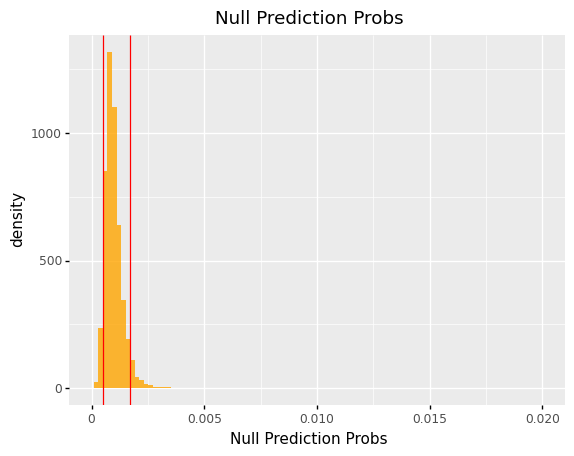

<ggplot: (8768678068213)>

In [16]:
display(ggplot(data=null_df, mapping=aes(x='null_score'))       
            + geom_histogram(mapping=aes(y='stat(density)'), fill='#ffa500', alpha=0.8, bins=100)
            + labs(title='Null Prediction Probs', x='Null Prediction Probs')
            + geom_vline(mapping=aes(xintercept=np.quantile(smooth_data.flatten(),0.05)), color='red')
            + geom_vline(mapping=aes(xintercept=np.quantile(smooth_data.flatten(),0.95)), color='red')
            + xlim(0,0.02))